In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
def extract_atomic_facts(text):
    """
    Splits the input text into atomic facts by dividing it into sentences.
    Each sentence is treated as an independent atomic fact.
    """
    return [fact.strip() for fact in text.split('.') if fact.strip()]


In [3]:
def evaluate_atomic_facts(atomic_facts, knowledge_source):
    """
    Compares atomic facts to a provided knowledge source to determine which are supported.
    Returns:
      - factscore: Ratio of supported facts to total facts.
      - supported_facts: List of atomic facts found in the knowledge source.
    """
    knowledge_facts = [fact.strip() for fact in knowledge_source.split('.') if fact.strip()]
    supported_facts = [fact for fact in atomic_facts if fact in knowledge_facts]
    factscore = len(supported_facts) / len(atomic_facts) if atomic_facts else 0
    return factscore, supported_facts


In [4]:
data_source = """
Bridget Moynahan is an American actress. She is best known for her role in Blue Bloods.
She studied acting at the American Academy of Dramatic Arts.
"""


In [5]:
generated_text_gpt4 = """
Bridget Moynahan is an American actress and producer.
She is best known for her role in Blue Bloods.
"""
generated_text_vicuna = """
Bridget Moynahan is an American actress, model, and producer.
She is best known for her roles in Grey’s Anatomy, I, Robot, and Blue Bloods.
She studied acting at the American Academy of Dramatic Arts.
"""
generated_text_dolly = """
Bridget Moynahan is an American actress, model, and producer.
Bridget Moynahan is an American actress and producer.
She is best known for her roles in Grey’s Anatomy, I, Robot, and Blue Bloods.
She studied acting at the American Academy of Dramatic Arts.
"""


In [6]:
models = ["GPT-4", "Vicuna", "Dolly"]
generated_texts = [generated_text_gpt4, generated_text_vicuna, generated_text_dolly]
results = []

for i, text in enumerate(generated_texts):
    atomic_facts = extract_atomic_facts(text)
    factscore, validated_facts = evaluate_atomic_facts(atomic_facts, data_source)
    results.append({
        "Model": models[i],
        "FACTSCORE": factscore,
        "Validated Count": len(validated_facts),
        "Total Facts": len(atomic_facts),
        "Validated Facts": validated_facts,
        "Actual Facts": atomic_facts
    })
    print(f"\nResults for {models[i]}:")
    print("FACTSCORE:", factscore)
    print("Validated Facts:", validated_facts)
    print("Actual Facts:", atomic_facts)



Results for GPT-4:
FACTSCORE: 0.5
Validated Facts: ['She is best known for her role in Blue Bloods']
Actual Facts: ['Bridget Moynahan is an American actress and producer', 'She is best known for her role in Blue Bloods']

Results for Vicuna:
FACTSCORE: 0.3333333333333333
Validated Facts: ['She studied acting at the American Academy of Dramatic Arts']
Actual Facts: ['Bridget Moynahan is an American actress, model, and producer', 'She is best known for her roles in Grey’s Anatomy, I, Robot, and Blue Bloods', 'She studied acting at the American Academy of Dramatic Arts']

Results for Dolly:
FACTSCORE: 0.25
Validated Facts: ['She studied acting at the American Academy of Dramatic Arts']
Actual Facts: ['Bridget Moynahan is an American actress, model, and producer', 'Bridget Moynahan is an American actress and producer', 'She is best known for her roles in Grey’s Anatomy, I, Robot, and Blue Bloods', 'She studied acting at the American Academy of Dramatic Arts']


In [7]:
comparison_data = {
    "Model": [result["Model"] for result in results],
    "FACTSCORE": [result["FACTSCORE"] for result in results],
    "Validated Count": [result["Validated Count"] for result in results],
    "Total Facts": [result["Total Facts"] for result in results],
}
df_comparison = pd.DataFrame(comparison_data)
print("\nComparison of Models:")
print(df_comparison)



Comparison of Models:
    Model  FACTSCORE  Validated Count  Total Facts
0   GPT-4   0.500000                1            2
1  Vicuna   0.333333                1            3
2   Dolly   0.250000                1            4


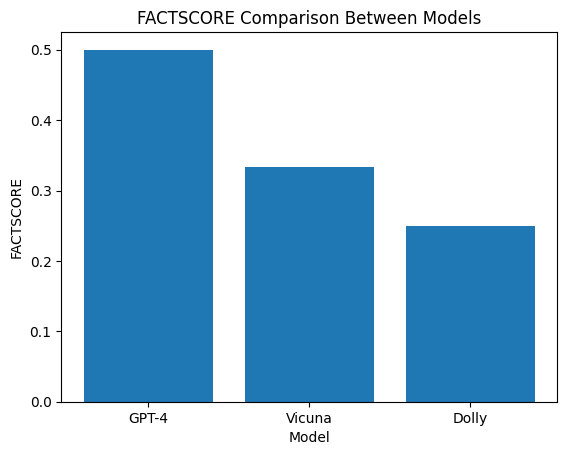

In [8]:
plt.bar(comparison_data["Model"], comparison_data["FACTSCORE"])
plt.title("FACTSCORE Comparison Between Models")
plt.xlabel("Model")
plt.ylabel("FACTSCORE")
plt.show()
